In [ ]:
from scipy import stats

In [338]:
from gradients import *

In [2]:
df = pd.read_csv('subjects_gradients_ecc.csv')

In [3]:
df

,roi,value,subj,epic,indic
0,0,-0.774317,1,baseline,grad1
1,1,-1.407623,1,baseline,grad1
2,2,-1.905399,1,baseline,grad1
3,3,-1.225759,1,baseline,grad1
4,4,-0.971639,1,baseline,grad1
...,...,...,...,...,...
598795,993,1.497172,46,late,ecc
598796,994,2.645587,46,late,ecc
598797,995,0.922904,46,late,ecc
598798,996,2.302812,46,late,ecc


In [11]:
df.shape[0] / 998 / 40 / 5 / 3

1.0

In [33]:
df.subj.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 35, 36, 38, 39,
       40, 42, 43, 44, 45, 46])

---

In [ ]:
# TODO ttest for epics

In [11]:
d2 = df[(df.region_idx == 1)
& (df.epic == 'late_learning')
& (df.comp == 'ecc')
]

d2

,region_idx,value,subj,epic,comp
359281,1,1.606313,1,baseline,ecc
362275,1,0.496450,2,baseline,ecc
365269,1,4.227021,3,baseline,ecc
368263,1,2.514823,4,baseline,ecc
371257,1,1.130451,5,baseline,ecc
374251,1,2.087999,6,baseline,ecc
377245,1,1.805020,7,baseline,ecc
380239,1,2.810723,8,baseline,ecc
383233,1,1.121538,9,baseline,ecc
386227,1,1.491182,10,baseline,ecc


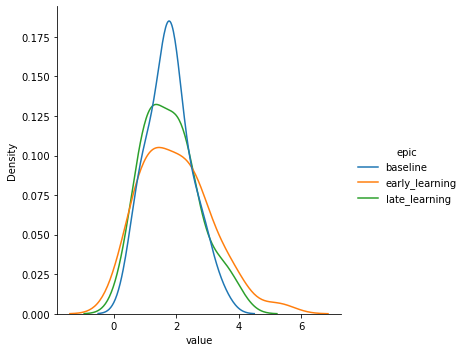

In [ ]:
sns.displot(
    x='value', hue='epic',
    data=df[
        (df.region_idx == 100) & (df.comp == 'ecc')
    ],
    kind='kde'
)

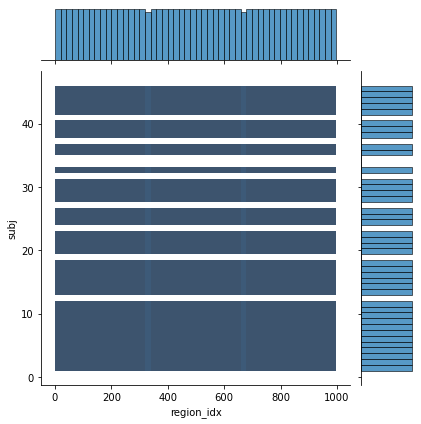

In [ ]:
sns.jointplot(
    x='region_idx', y='subj',
    data=df[df.comp == 'ecc'],
    kind='hist'
)

---

In [14]:
stats.ttest_ind([1,2,4], [4, 5])

Ttest_indResult(statistic=-1.8085816934646561, pvalue=0.16822899527384716)

In [15]:
stats.f_oneway([1,2,4], [4, 5], [23, 53, 6])

F_onewayResult(statistic=2.411747473267907, pvalue=0.18482467264369268)

---

In [16]:
df.groupby(['epic', 'indic']).value.mean()

epic      indic
baseline  ecc      2.749806e+00
          grad1   -2.346987e-17
          grad2   -3.659954e-18
          grad3    4.538788e-18
          grad4    1.183645e-17
early     ecc      2.960457e+00
          grad1   -7.279859e-17
          grad2   -5.775273e-17
          grad3   -2.990955e-17
          grad4    8.880116e-18
late      ecc      2.914213e+00
          grad1    5.572669e-18
          grad2    4.041245e-17
          grad3   -2.881240e-18
          grad4    4.278475e-17
Name: value, dtype: float64

In [18]:
rois = df.groupby(['epic', 'indic', 'roi']).value.apply(list).reset_index()
rois

,epic,indic,roi,value
0,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428..."
1,baseline,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270..."
2,baseline,ecc,2,"[2.232096057356207, 3.504821656370252, 3.89460..."
3,baseline,ecc,3,"[2.600396140943782, 1.659197246942436, 4.67765..."
4,baseline,ecc,4,"[2.093912173687403, 2.9646337560879377, 4.4966..."
...,...,...,...,...
14965,late,grad4,993,"[-0.4214530817058477, -1.3875244388004755, -2...."
14966,late,grad4,994,"[0.194128597438479, -1.001630205353598, -0.724..."
14967,late,grad4,995,"[-0.560670353660302, -1.0763102070249144, -1.2..."
14968,late,grad4,996,"[0.8191046970122979, -2.4008276785439144, -2.0..."


In [20]:
rois.groupby('roi').value.count()

roi
0      15
1      15
2      15
3      15
4      15
       ..
993    15
994    15
995    15
996    15
997    15
Name: value, Length: 998, dtype: int64

---
compare epics within a comp

In [197]:
rois

,epic,comp,region_idx,value
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29..."
1,baseline,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2..."
2,baseline,0,2,"[-1.9053989206588555, 2.476543594211244, -3.00..."
3,baseline,0,3,"[-1.2257587934677732, -1.0593325749036806, -3...."
4,baseline,0,4,"[-0.9716389947455218, -1.446878671812038, -3.2..."
...,...,...,...,...
11971,late_learning,ecc,993,"[2.527571017762124, 2.9239077240085125, 3.0931..."
11972,late_learning,ecc,994,"[2.3328999688422964, 2.240706812380316, 2.6440..."
11973,late_learning,ecc,995,"[2.293418571562177, 2.381527520659193, 2.59352..."
11974,late_learning,ecc,996,"[2.577951902303398, 2.692900243291526, 2.55967..."


In [204]:
11976 * 6

71856

In [21]:
rois.groupby(['indic','roi']).value.count()

indic  roi
ecc    0      3
       1      3
       2      3
       3      3
       4      3
             ..
grad4  993    3
       994    3
       995    3
       996    3
       997    3
Name: value, Length: 4990, dtype: int64

In [34]:
d1 = rois.merge(rois, on=['indic', 'roi'])

In [227]:
d1.shape[0] #* (9 - 3)

35928

In [35]:
d1

,epic_x,indic,roi,value_x,epic_y,value_y
0,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...",baseline,"[3.738823583537087, 1.7368981192979858, 1.0428..."
1,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...",early,"[1.4828515112597205, 1.9462027453800856, 1.571..."
2,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...",late,"[3.2978642478487115, 1.6320123924229435, 1.318..."
3,early,ecc,0,"[1.4828515112597205, 1.9462027453800856, 1.571...",baseline,"[3.738823583537087, 1.7368981192979858, 1.0428..."
4,early,ecc,0,"[1.4828515112597205, 1.9462027453800856, 1.571...",early,"[1.4828515112597205, 1.9462027453800856, 1.571..."
...,...,...,...,...,...,...
44905,early,grad4,997,"[-0.7199885757096268, -0.8758789834983767, -1....",early,"[-0.7199885757096268, -0.8758789834983767, -1...."
44906,early,grad4,997,"[-0.7199885757096268, -0.8758789834983767, -1....",late,"[0.6251946378245254, -2.0693332185314697, -2.0..."
44907,late,grad4,997,"[0.6251946378245254, -2.0693332185314697, -2.0...",baseline,"[1.167490242896826, -1.0584063616187314, -2.68..."
44908,late,grad4,997,"[0.6251946378245254, -2.0693332185314697, -2.0...",early,"[-0.7199885757096268, -0.8758789834983767, -1...."


In [208]:
35928 / 11976

3.0

In [29]:
d1[~(d1.epic_x == d1.epic_y)].shape[0]

29940

In [211]:
23952 + 11976

35928

In [36]:
d1 = d1[~(d1.epic_x == d1.epic_y)]

In [37]:
d1['pair'] = d1.apply(lambda r: r['epic_x'] + '__' + r['epic_y']
if (r['epic_x'] < r['epic_y'])
else r['epic_y'] + '__' + r['epic_x'], axis=1)

In [38]:
d1 = d1.drop_duplicates(['indic', 'roi', 'pair']).drop(['epic_x', 'epic_y'], axis=1)

In [39]:
d1

,indic,roi,value_x,value_y,pair
1,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...","[1.4828515112597205, 1.9462027453800856, 1.571...",baseline__early
2,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...","[3.2978642478487115, 1.6320123924229435, 1.318...",baseline__late
5,ecc,0,"[1.4828515112597205, 1.9462027453800856, 1.571...","[3.2978642478487115, 1.6320123924229435, 1.318...",early__late
10,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270...","[1.6264553230942744, 1.31225455764315, 3.87989...",baseline__early
11,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270...","[3.671105939121064, 1.1826795772943928, 3.2401...",baseline__late
...,...,...,...,...,...
44894,grad4,996,"[-0.4754541431192363, -1.4953203668601391, -2....","[0.8191046970122979, -2.4008276785439144, -2.0...",baseline__late
44897,grad4,996,"[-0.1802052293059366, -1.237240360175787, -1.6...","[0.8191046970122979, -2.4008276785439144, -2.0...",early__late
44902,grad4,997,"[1.167490242896826, -1.0584063616187314, -2.68...","[-0.7199885757096268, -0.8758789834983767, -1....",baseline__early
44903,grad4,997,"[1.167490242896826, -1.0584063616187314, -2.68...","[0.6251946378245254, -2.0693332185314697, -2.0...",baseline__late


In [40]:
ALPHA = 0.05

In [41]:
d1['tstat'] = d1.apply(lambda x: stats.ttest_ind(x['value_x'], x['value_y']).statistic, axis=1)
d1['pvalue'] = d1.apply(lambda x: stats.ttest_ind(x['value_x'], x['value_y']).pvalue, axis=1)
d1['signif'] = d1.pvalue.apply(lambda x: 1 if x < ALPHA else 0)

In [42]:
d1 = d1.drop(['value_x', 'value_y'], axis=1)

In [43]:
d1

,indic,roi,pair,tstat,pvalue,signif
1,ecc,0,baseline__early,-0.444305,0.658053,0
2,ecc,0,baseline__late,-0.947098,0.346514,0
5,ecc,0,early__late,-0.440811,0.660569,0
10,ecc,1,baseline__early,-1.124894,0.264084,0
11,ecc,1,baseline__late,-0.886355,0.378151,0
...,...,...,...,...,...,...
44894,grad4,996,baseline__late,-2.472372,0.015599,1
44897,grad4,996,early__late,-0.467313,0.641579,0
44902,grad4,997,baseline__early,-0.038605,0.969304,0
44903,grad4,997,baseline__late,-0.546235,0.586463,0


In [44]:
# d1.to_csv('rois_pairwise_stats.csv', index=False)

plotting

In [259]:
d1[(d1.comp=='ecc')&(d1['diff']=='baseline_2_early_learning')]

,comp,region_idx,diff,tstat,pvalue,signif
26947,ecc,0,baseline_2_early_learning,-0.444305,0.658053,0
26956,ecc,1,baseline_2_early_learning,-1.124894,0.264084,0
26965,ecc,2,baseline_2_early_learning,-0.938319,0.350977,0
26974,ecc,3,baseline_2_early_learning,-0.050211,0.960082,0
26983,ecc,4,baseline_2_early_learning,0.543548,0.588303,0
...,...,...,...,...,...,...
35884,ecc,993,baseline_2_early_learning,0.985519,0.327416,0
35893,ecc,994,baseline_2_early_learning,-1.471310,0.145230,0
35902,ecc,995,baseline_2_early_learning,-0.136631,0.891674,0
35911,ecc,996,baseline_2_early_learning,0.742014,0.460307,0


In [49]:
surf_labels, mask_removed = load_atlas(load_data(subj=1, epic='rest'))

In [58]:
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_yarg',
    'tstat': 'gist_yarg',
    'pvalue': 'gist_gray'
}

In [ ]:
statistics = ['tstat', 'signif']
indicators = ['ecc', 'grad4']

Context leak detected, msgtracer returned -1


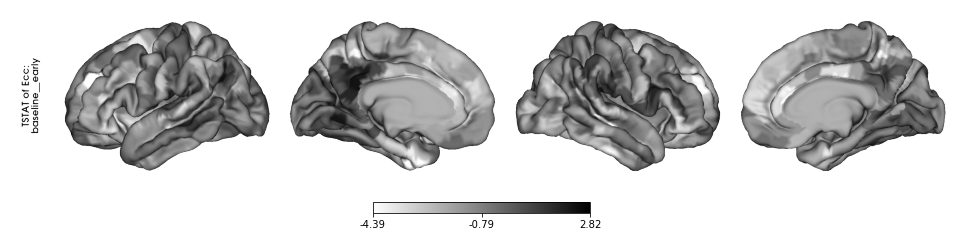

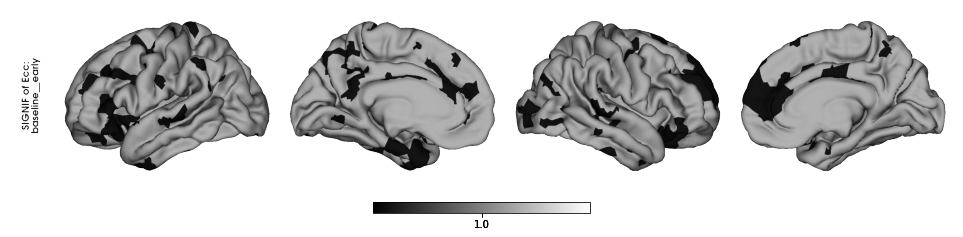

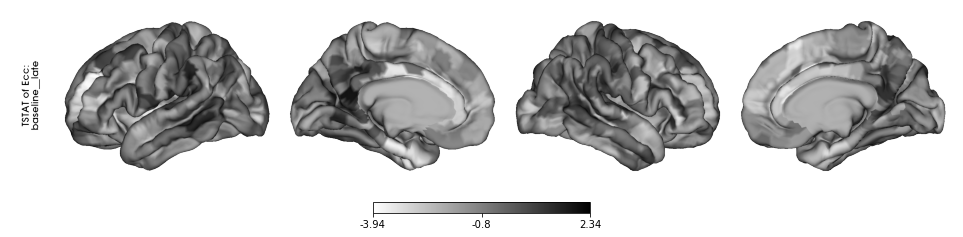

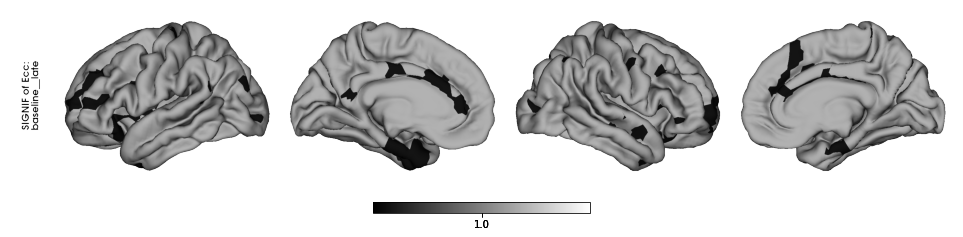

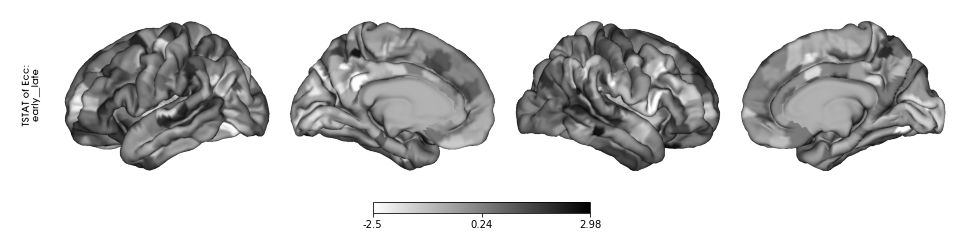

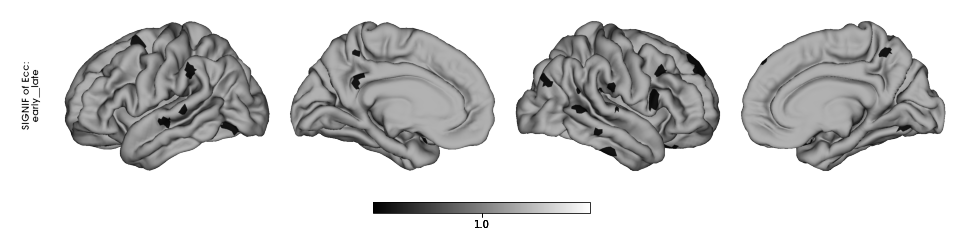

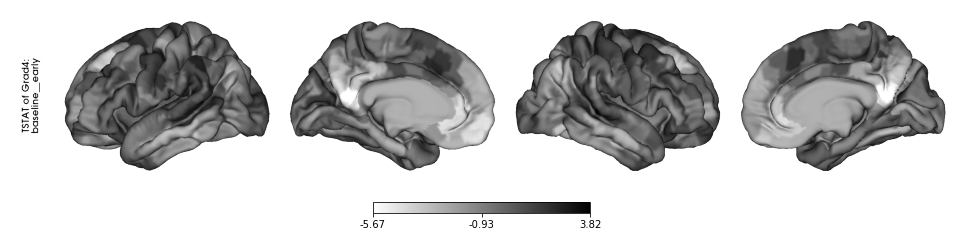

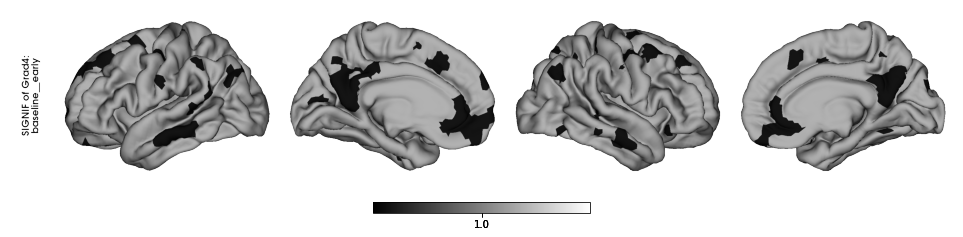

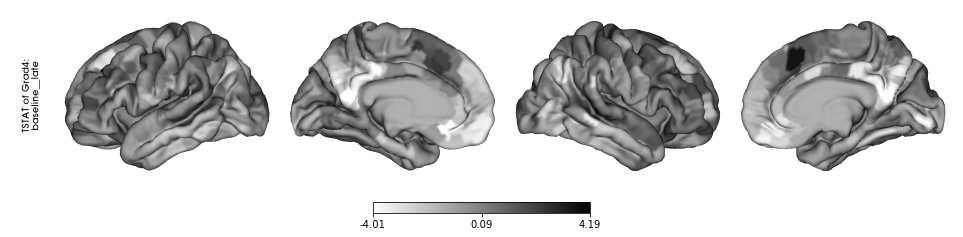

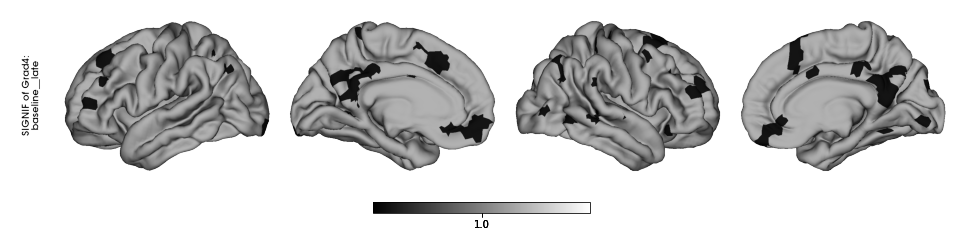

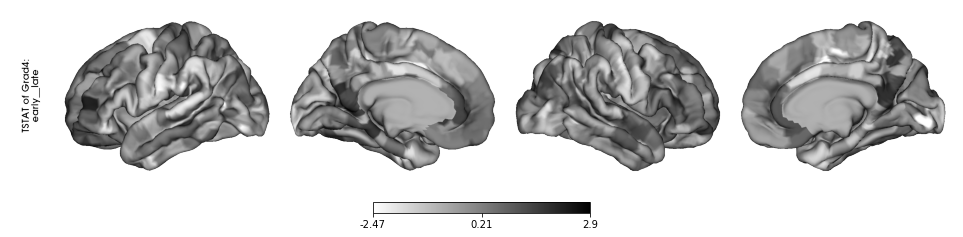

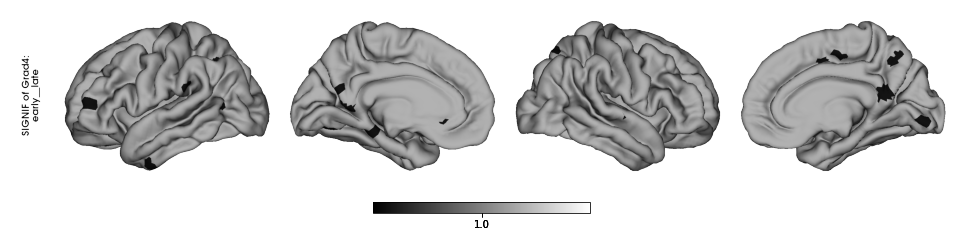

In [60]:
for c in indicators:
    for contrast in d1['pair'].unique():
        d = d1[(d1['indic'] == c)&(d1['pair'] == contrast)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, s.upper() + ' of ' + c.capitalize() + ':\n' + contrast, cmap[s], None)

---

In [61]:
rois

,epic,indic,roi,value
0,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428..."
1,baseline,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270..."
2,baseline,ecc,2,"[2.232096057356207, 3.504821656370252, 3.89460..."
3,baseline,ecc,3,"[2.600396140943782, 1.659197246942436, 4.67765..."
4,baseline,ecc,4,"[2.093912173687403, 2.9646337560879377, 4.4966..."
...,...,...,...,...
14965,late,grad4,993,"[-0.4214530817058477, -1.3875244388004755, -2...."
14966,late,grad4,994,"[0.194128597438479, -1.001630205353598, -0.724..."
14967,late,grad4,995,"[-0.560670353660302, -1.0763102070249144, -1.2..."
14968,late,grad4,996,"[0.8191046970122979, -2.4008276785439144, -2.0..."


In [62]:
d2 = rois.groupby(['indic', 'roi']).value.apply(list).reset_index()

In [297]:
3992 / 998

4.0

In [305]:
d2

,comp,region_idx,value
0,0,0,"[[-0.7743170065748008, -1.597662094371461, 0.2..."
1,0,1,"[[-1.4076225483498692, 0.4911792468296018, -3...."
2,0,2,"[[-1.9053989206588555, 2.476543594211244, -3.0..."
3,0,3,"[[-1.2257587934677732, -1.0593325749036806, -3..."
4,0,4,"[[-0.9716389947455218, -1.446878671812038, -3...."
...,...,...,...
3987,ecc,993,"[[2.878588733458335, 1.738677794356745, 3.3424..."
3988,ecc,994,"[[2.63374566382278, 2.9651404831840247, 1.4733..."
3989,ecc,995,"[[2.1138911715732043, 2.1222181638594177, 1.99..."
3990,ecc,996,"[[2.2656535484103486, 1.944684617879056, 2.730..."


In [63]:
d2['fstat'] = d2.value.apply(lambda x: stats.f_oneway(*x).statistic)
d2['pvalue'] = d2.value.apply(lambda x: stats.f_oneway(*x).pvalue)

ALPHA = 0.05
d2['signif'] = d2.pvalue.apply(lambda x: 1 if x < ALPHA else 0)

In [64]:
d2 = d2.drop('value', axis=1)

In [65]:
d2

,indic,roi,fstat,pvalue,signif
0,ecc,0,0.408893,0.665331,0
1,ecc,1,0.747181,0.475947,0
2,ecc,2,0.519728,0.596048,0
3,ecc,3,0.059077,0.942663,0
4,ecc,4,0.173517,0.840919,0
...,...,...,...,...,...
4985,grad4,993,2.180296,0.117579,0
4986,grad4,994,0.119942,0.887081,0
4987,grad4,995,2.071467,0.130597,0
4988,grad4,996,3.372169,0.037683,1


In [66]:
# d2.to_csv('rois_anova_stats.csv', index=False)

plotting

In [67]:
statistics = ['signif']
indicators = ['ecc', 'grad4']

In [68]:
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_yarg',
    'pvalue': 'gist_gray'
}

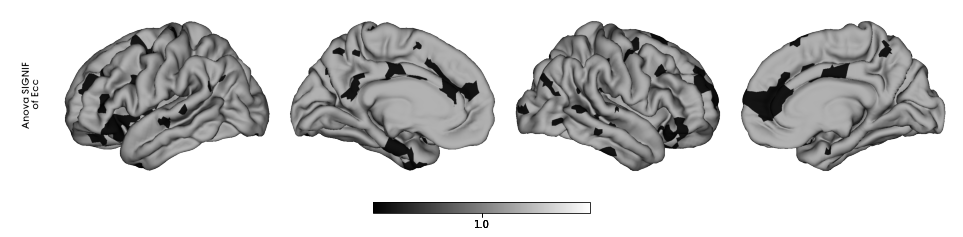

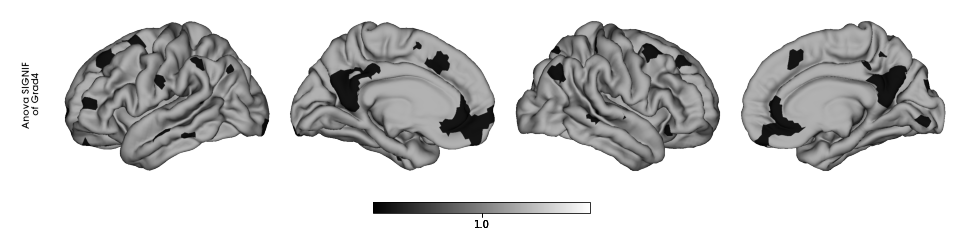

In [74]:
for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], None)

---